In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [36]:
stock = "GOOGL"
df = pd.DataFrame(yf.download(stock, '2022-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [15]:
def rolling(lag, data):
    A = []
    df = data.tolist()
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return pd.DataFrame(A)

def MLP(x,y):
    model = MLPClassifier()
    model.fit(x,y)
    return model

def UoD(x):
    if x<0:
        return -1
    else: 
        return 1
    
def train_test_split(x,y,test_size):
    i = int(len(x)*test_size)
    j = int(len(y)*test_size)
    return x[:i], x[i:], y[:j], y[j:]

In [37]:
df["returns"] =df["Close"].pct_change()
df["UoD"]= df["returns"].map(UoD)
df.dropna(inplace=True)

In [38]:
lag = 3
A = rolling(lag, df["returns"])
b = df["UoD"][lag::]
deon, dete, keyon, keyte = train_test_split(A,b, test_size=0.3)

In [39]:
a = MLP(deon, keyon)
accuracy_score(keyte, a.predict(dete))

0.5549132947976878

[]

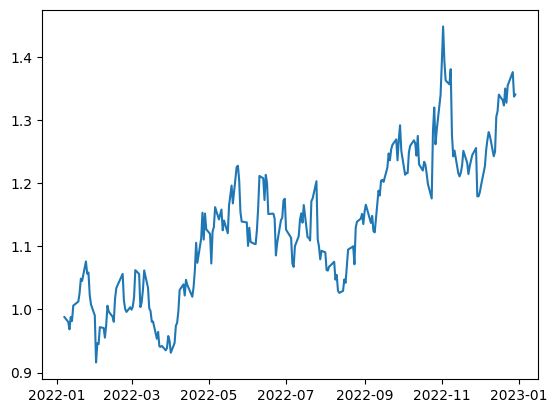

In [41]:
c = a.predict(A)
re2 = c*df["returns"][lag::].shift(-1)
plt.plot(np.cumprod(1+re2))
plt.plot()

In [24]:
re2

Date
2010-01-07    1.0
2010-01-08    1.0
2010-01-11   -1.0
2010-01-12   -1.0
2010-01-13    1.0
             ... 
2022-12-23   -1.0
2022-12-27   -1.0
2022-12-28    1.0
2022-12-29   -1.0
2022-12-30    NaN
Name: UoD, Length: 3269, dtype: float64